In [17]:
import numpy as np

# full = 0

# for i in range(100):
#     M = np.random.random((60,60))
#     if np.linalg.matrix_rank(M) == 60:
#         full += 1

# print(full/100)



In [108]:
def is_full_rank(M, detail=False):
    row,col = M.shape 
    for i in range(col):
        for j in range(i,row):
            if M[j][i]:                
                for k in range(j+1,row):
                    if M[k][i]:
                        M[k] ^= M[j]                
                M[[i,j]] = M[[j,i]]                
                if detail:
                    print(M)
                break                
        else:
            return False
    return True

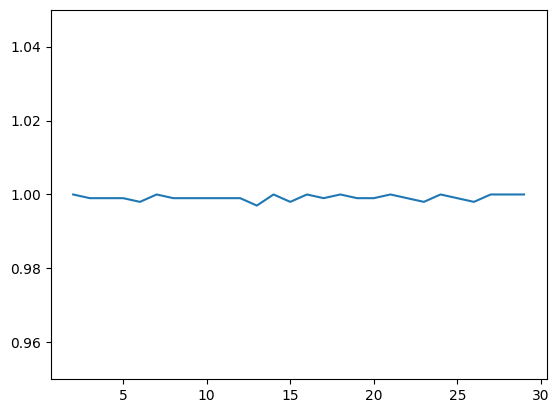

In [96]:
import matplotlib.pyplot as plt

yf = []
xf = []
N = 1000
for k in range(2,30):
    full = 0
    for i in range(N):
        x = np.random.randint(0,2,size=(k+10,k))
        if is_full_rank(x):
            full+=1
    xf.append(k)
    yf.append(full/N)

plt.ylim(0.95,1.05)
plt.plot(xf,yf)


In [178]:
def get_prob(row, col):
    N = 100000
    full = 0
    
    for num in range(N):
        M = np.zeros((row,col),dtype=int)
        for i in range(row):
            start = np.random.randint(0,col)
            M[i][start]=1
            for k in range(1,20):
                id = start + k
                if id >= col:
                    id -= col
                if np.random.random() < 0.64:
                    M[i][id] = 1
        if is_full_rank(M):
            full+=1
    return full/N
get_prob(125,100)

0.99934